# Dimensionality Reduction

Learning Objectives:
* Students will learn the motivation for dimensionality reduction techniques.
* Students will be exposed to two algorithmic approaches to dimensionality reduction: principal component analysis (PCA) and $t$-distributed stochastic neighbor embedding ($t$-SNE).
* Students will practice the application of PCA with a biplot for gaining visual insight to higher-dimensional data.

Video/Readings before class:
* PCA:
  * Jake VanderPlas. [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/):
      * [Chapter 5 section "In Depth: Principal Component Analysis"](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)
  * Michael Galarnyk's tutorial [PCA using Python (scikit-learn)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60) _Note: [MNIST](https://en.wikipedia.org/wiki/MNIST_database) is pronounced "em nist", not "minced".  If you prefer, you can go through this tutorial with his [companion YouTube video](https://www.youtube.com/watch?v=kApPBm1YsqU).  We will look at his Iris dataset PCA a bit closer below._
  * Optional: James et al. [An Introduction to Statistical Learning with Applications in R, section 10.2](http://faculty.marshall.usc.edu/gareth-james/ISL/) _This excellent, free Data Science textbook provides greater mathematical insight to algorithms such as these, and features interesting examples.  We will work with one of their examples below in Python._
* t-SNE:
  * Wattenberg et al. [How to use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)
  * Briefly skim the general area of manifold learning: Jake VanderPlas. [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/):
      * [Chapter 5 section "In Depth: Manifold Learning"](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html)

For reference:
  * [sklearn.decomposition.PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
  * [sklearn.manifold.TSNE documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

Before class:
* View/read the above resources so as to understand how each of the two dimensionality reduction methods works.  Below, we will demonstrate the application of both.

In class:
* We will work together on the exercise in section "In Class".

Homework after class:
* Complete the section labeled "Homework" below before the next class when it will be collected.


In [116]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap


# PCA Visualization of the Iris Dataset

The [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) is a very common ML example classification dataset that has four inputs (sepal length, sepal width, petal length, and petal width in cm) and one output (class of iris: Iris Setosa, Iris Versicolour, or Iris Virginica).  Below is the code from the Galarnyk tutorial assigned above.

Load Iris DataSet:


   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Standardize the Data:
   sepal length  sepal width  petal length  petal width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977
PCA Projection to 2D:
   principal component 1  principal component 2
0              -2.264542               0.505704
1              -2.086426              -0.655405
2              -2.367950              -0.318477
3             

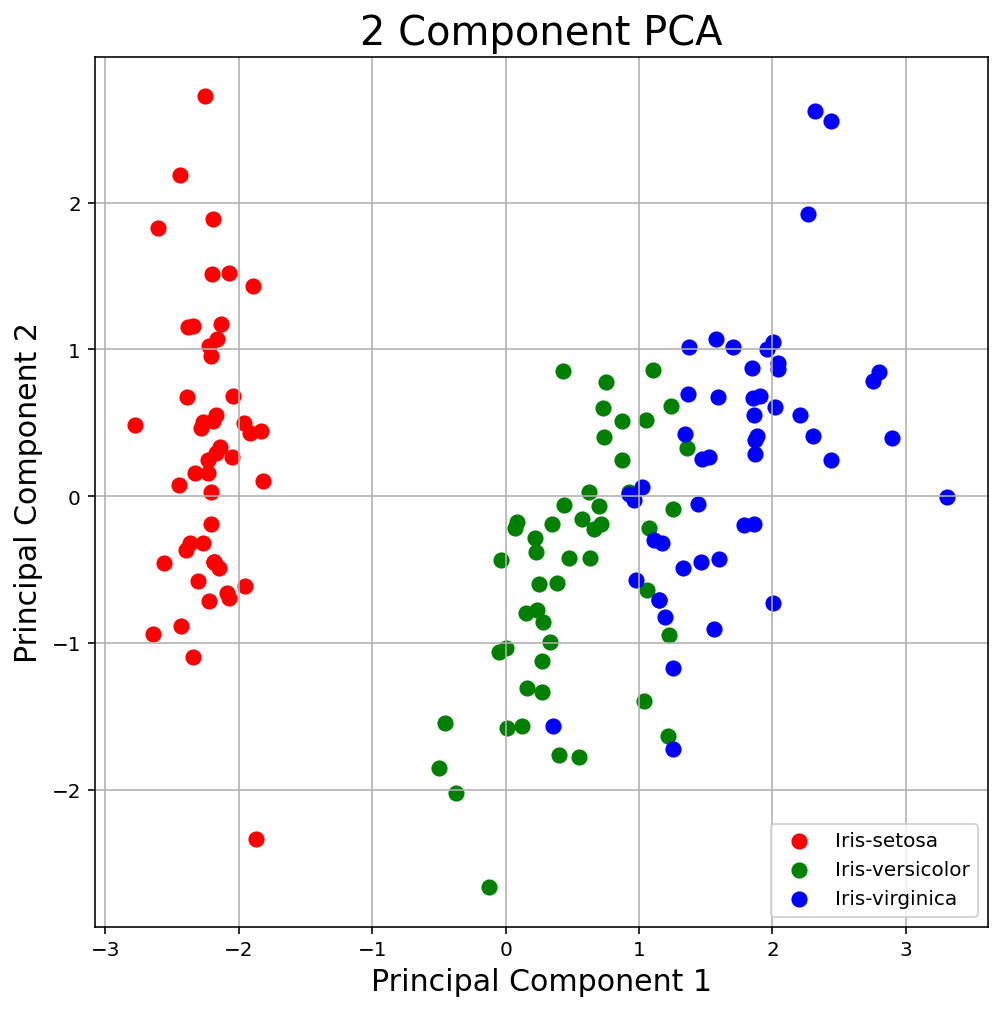

Explained Variance:
[0.72770452 0.23030523]


In [5]:
# PCA visualization of Iris data from https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb

print('Load Iris DataSet:')
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# loading dataset into Pandas DataFrame
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])
print(df.head())

print('Standardize the Data:')
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)
print(pd.DataFrame(data = x, columns = features).head())

print('PCA Projection to 2D:')
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf.head(5))
print(df[['target']].head())
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

print('Visualize 2D Projection:')
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

print('Explained Variance:')
print(pca.explained_variance_ratio_)


What we see in the figure above is 4-dimensional points mapped onto a 2-dimensional plane such that the principal component 1 and 2 axes capture ~73% and ~23% of the variance respectively.  One thing Galarnyk does not do with this example is give a sense of what these two principal components reflect in the original dimensions.  Here we will compute a "biplot" which overlays vectors for each of the original dimensions, showing how much they contribute towards each of these principal components.

First, let us look at the two principal component vectors themselves.

In [19]:
print(df.columns[:4])
pca.components_


Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')


array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

We could look at these principal component vectors and see that, for instance, sepal width has small negative contribution to principal component 1 (PC1), but very strong positive contribution to principal component 2 (PC2).  Overall, looking at the numbers, we see that all other attributes (i.e. input columns) positively contribute to PC1, but sepal width is considered largely in PC2.  Instead of looking at a sea of numbers, it can be helpful to plot these each of the attributes as a vector on top of our PCA scatterplot to get a 2D sense of the significant of the original 4D inputs:

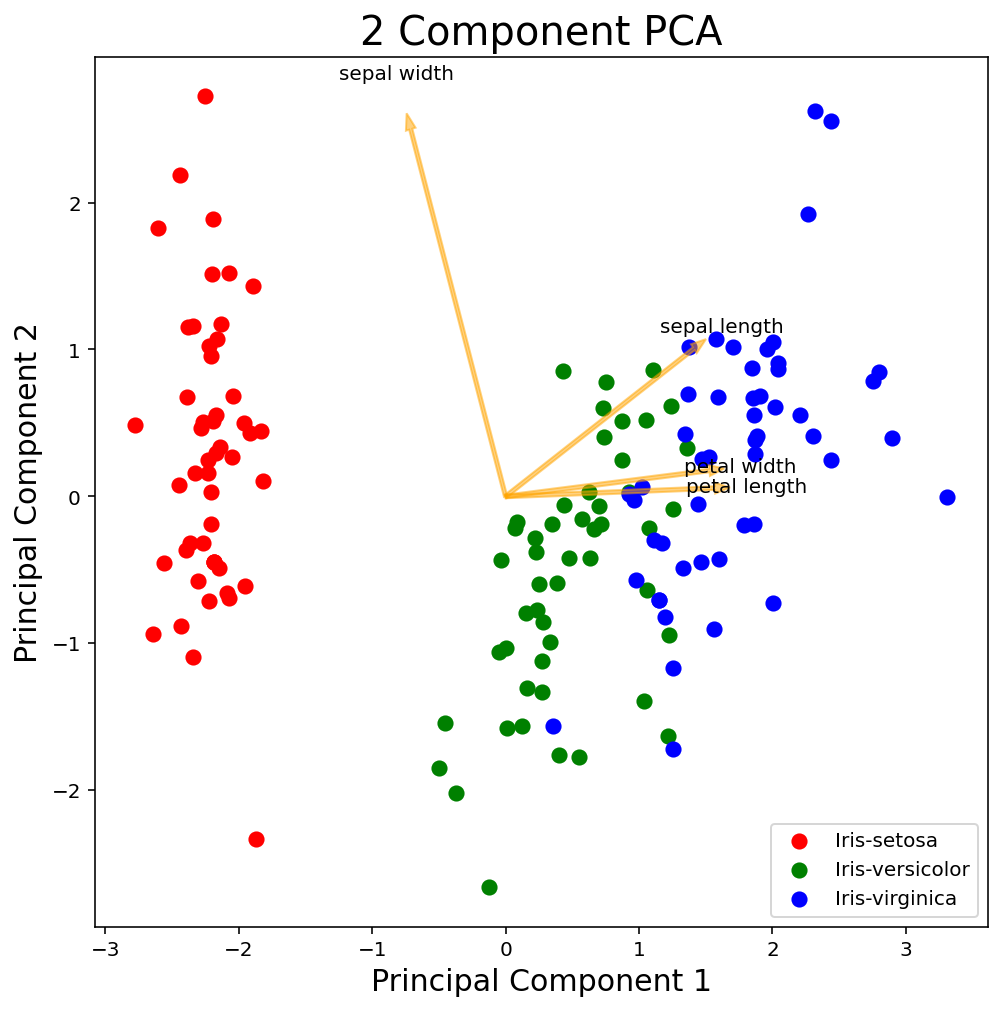

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)

# Adapted from https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot:
vector_scale = 2.7
text_beyond = 1.15
for i in range(len(pca.components_[0])):
    ax.arrow(0, 0, vector_scale * pca.components_[0, i], vector_scale * pca.components_[1, i], color='orange', alpha=0.5, width=.025)
    plt.text(vector_scale * pca.components_[0, i] * text_beyond, vector_scale * pca.components_[1, i] * text_beyond, df.columns[i], color='black', ha='center', va='center')

    ax.grid()
plt.show()


Another way of thinking of this is that a change in any given attribute moves the PCA 2D projection of the point in the direction of it's corresponding arrow with proportional magnitude of change.

As our authors have noted, PCA is an unsupervised learning algorithm that allows us to transform our original input data to a lower dimension, which can:
 1. yield helpful visualizations like these to better comprehend patterns in our data,
 2. yield a lower dimension representation that still captures most of the variation of the data while allowing more efficient machine learning with lower-dimensional data, and
 3. effectively filter noise by projecting data onto a lower-dimensional representation that retains the most essential components of the data.

In class, you will perform a similar task as above, but with a different dataset.


## $t$-distributed stochastic neighbor embedding ($t$-SNE)

Let's review VanderPlas' MNIST digit example from our PCA reading assignment:

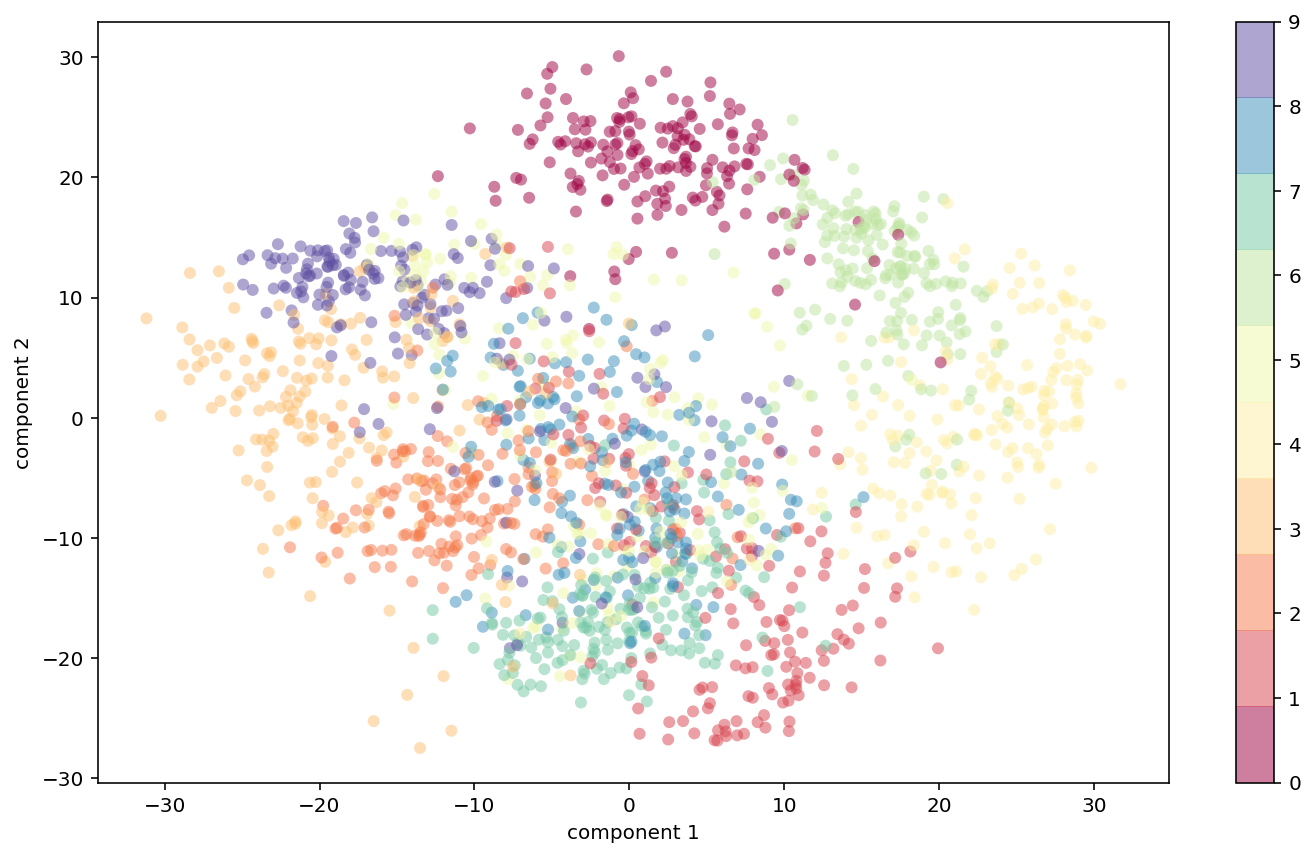

In [110]:
from sklearn.datasets import load_digits
digits = load_digits()
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))  # Note: 'Spectral' must now be capitalized, unlike lowercase 'spectral' in text.
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

Such visualizations can be helpful to make similarities and difference clear in high dimensional data.  In this case, we have 64-pixel images, so we are projecting 64 dimensions down to only 2!  With this representation, we can note that the dots labeled "6" are most similar to "5" on one side and "0" on the other side.  This makes sense.  If we break below where the loop of the "6" meets itself, we can continuously transform it into a "5".  Similarly, if we slide the connection of the loop upward and make the loop larger as the stem becomes smaller, the "6" continuously transforms into a "0".  These similarities, visualized here for us can help make us aware of what is necessary for digits to appear distinctive and where ambiguities can creep in.  (This is important for font design.)

However, we also see that PCA has a "bunching" problem with many of the other digits overlapping one another in 2 dimensions.

$t$-SNE is an algorithm that seeks to "unfold" points in high dimensions so as to project similar points near to one another in 2D, while holding different points apart.  Let us observe how $t$-SNE performs with the same data for different "perplexity" parameter settings.

Perplexity = 5


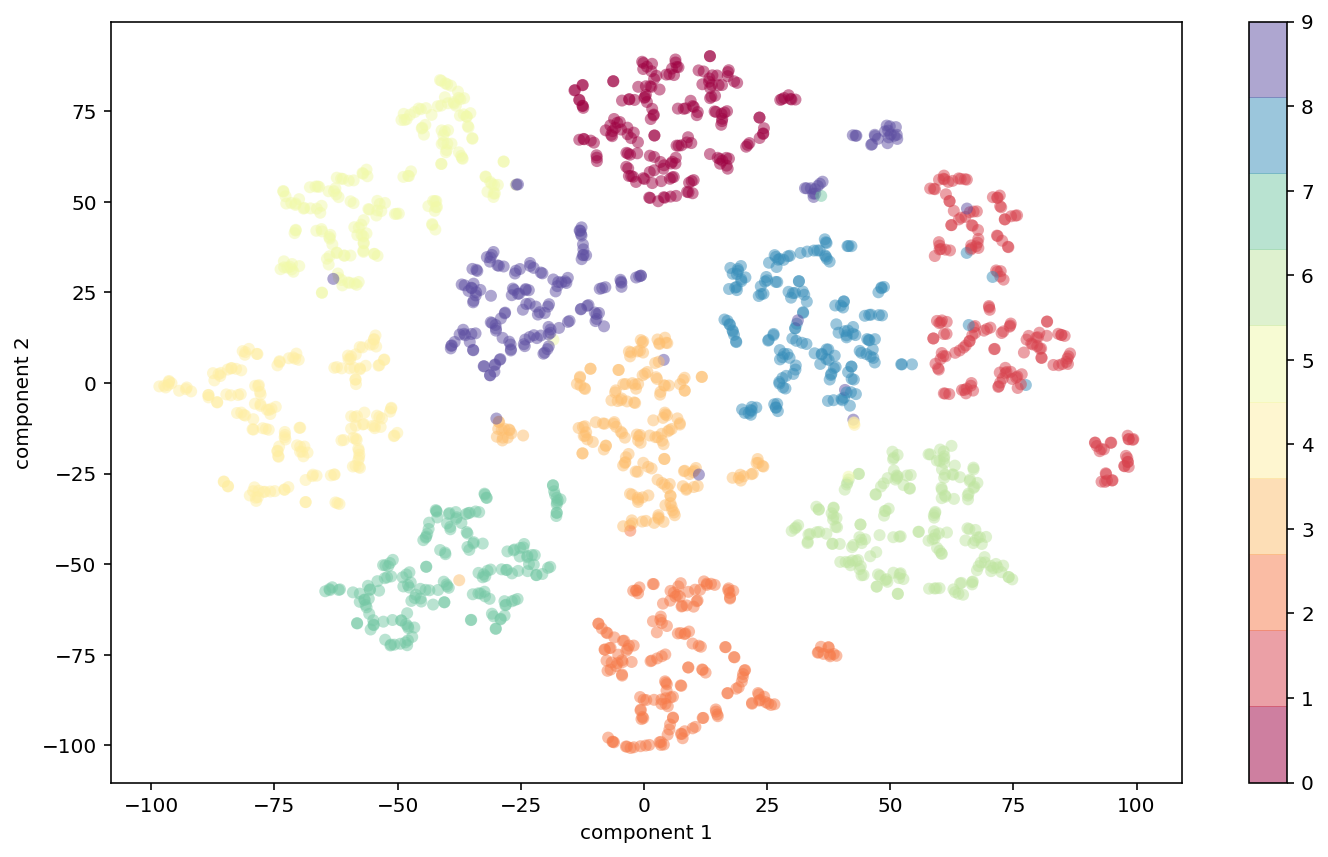

Perplexity = 30


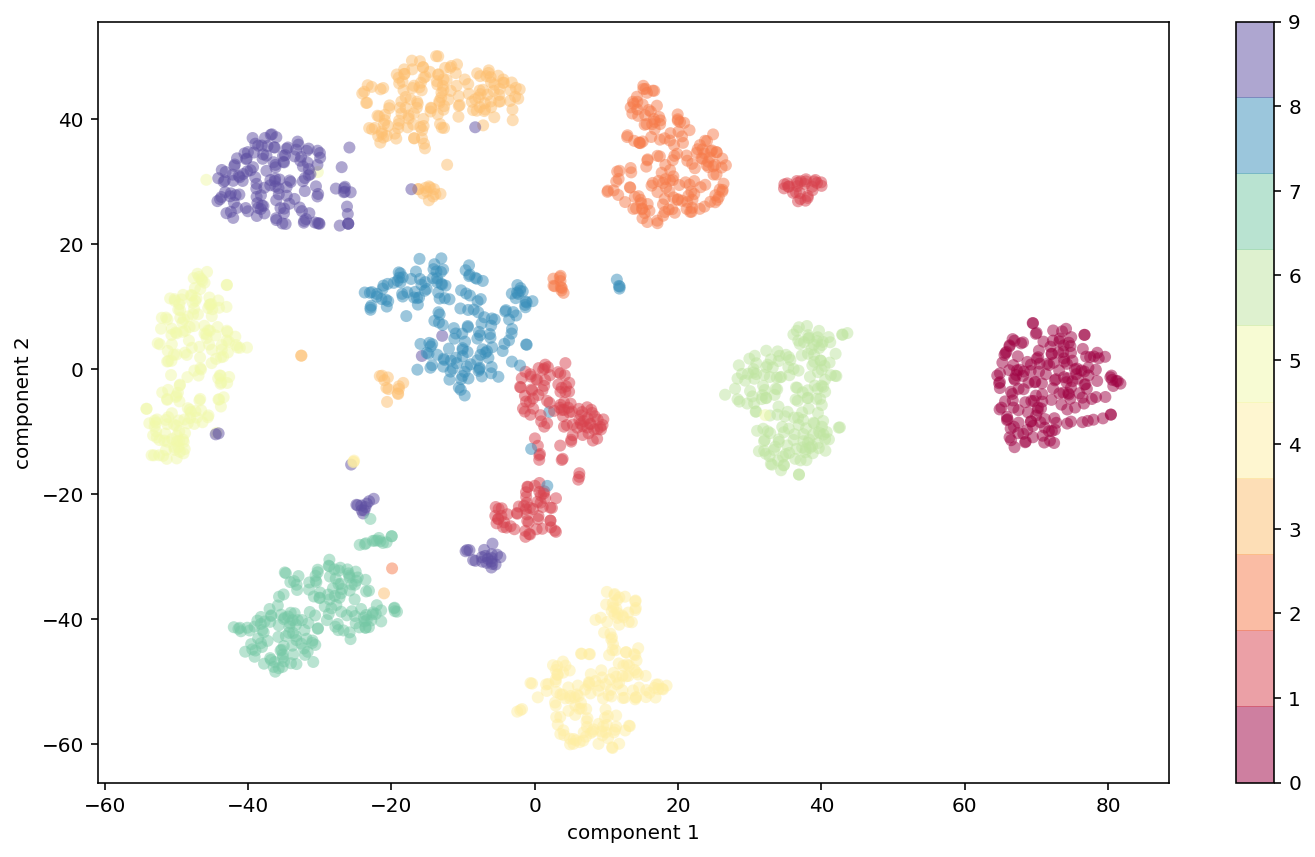

Perplexity = 50


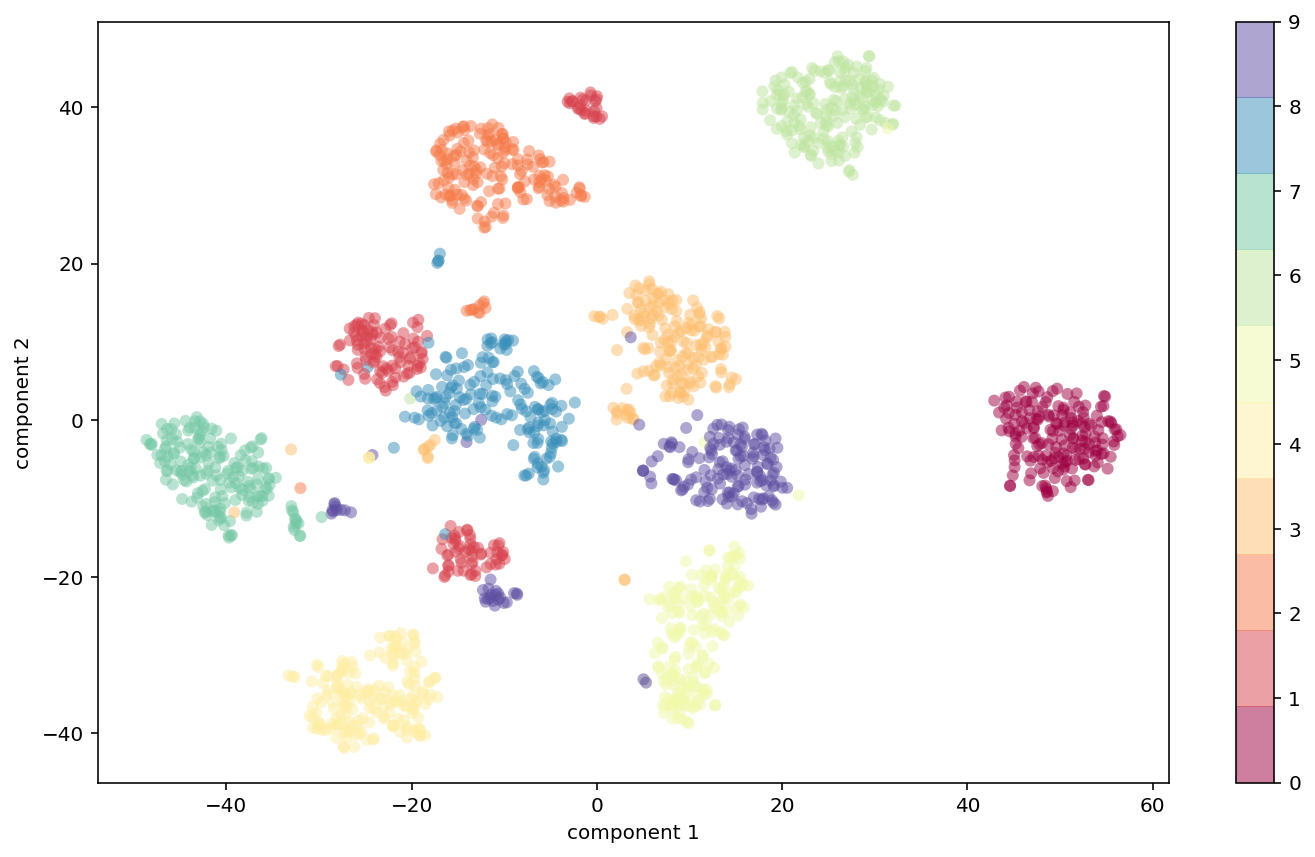

In [115]:
perplexities = [5, 30, 50]  # 30 is the default
for p in perplexities:
    print("Perplexity =", p)
    tsne = TSNE(random_state=0, perplexity=p)
    projected = tsne.fit_transform(digits.data)  # project from 64 to 2 dimensions
    plt.scatter(projected[:, 0], projected[:, 1],
                c=digits.target, edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('Spectral', 10))  # Note: 'Spectral' must now be capitalized, unlike lowercase 'spectral' in text.
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar()
    plt.show()


Note how sensitive $t$-SNE is to its perplexity parameter.  While it achieves good separation of digits data (without digits target values) using different perplexity values, you will note that the spatial relationships change from one value to the next.  Some strong similarity relationships are reflected in all runs, but take a moment to observe which digits are deemed most similar to one another in the different plots above.

Finally, watch this video where Daniel Smilkov, Fernanda Viégas, and Martin Wattenberg present ["A.I. Experiments: Visualizing High-Dimensional Space"](https://www.youtube.com/watch?v=wvsE8jm1GzE).  Not only will you see 3D $t$-SNE visualizations of the MNIST digit data where we can see related images/shapes, but you'll also see how $t$-SNE can discover related _words_ in text.  As you look further into this area, you can find applications to query answering, discovering genetic similarities, etc.

As unsupervised learning tools, dimensionality reduction can help us gain better insight into high-dimensional data in many application areas.

Postscript: We have been sticking fairly close to what is available in numpy, pandas, matplotlib, and sklearn.  A newer manifold learning method called [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://umap-learn.readthedocs.io/en/latest/) has gained in popularity for high-dimensional applications (e.g. for [single cell genomics](https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668)) where $t$-SNE typically requires one to preprocess with PCA to a smaller number of dimensions to make $t$-SNE computationally feasible.  Here's UMAP applied to the same MNIST digit data:

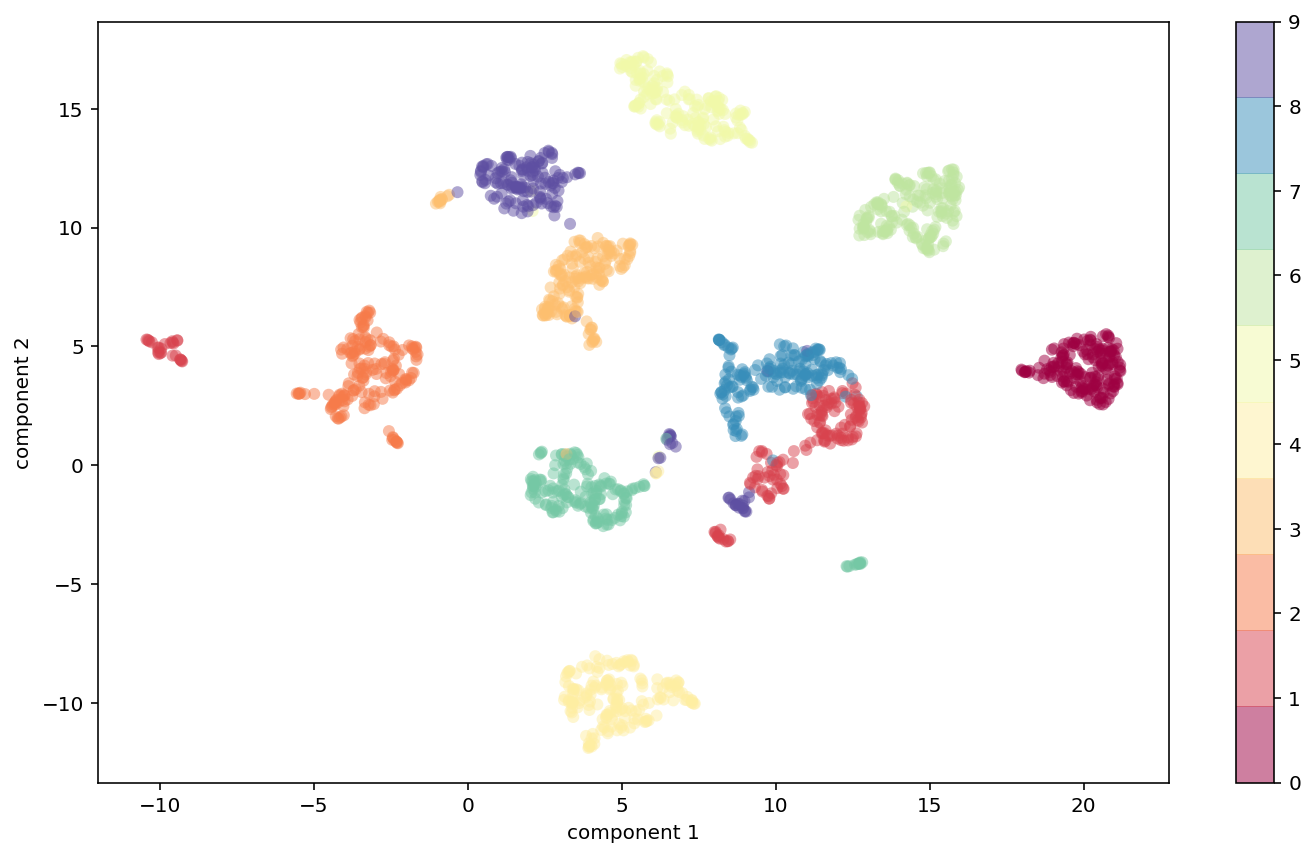

In [117]:
projected = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(digits.data)
plt.scatter(projected[:, 0], projected[:, 1],
                c=digits.target, edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('Spectral', 10))  # Note: 'Spectral' must now be capitalized, unlike lowercase 'spectral' in text.
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

# In Class

## Principal Component Analysis (PCA)

For your first exercise, your challenge is apply PCA and replicate the biplot of Figure 10.1 in James et al. [An Introduction to Statistical Learning with Applications in R, section 10.2](http://faculty.marshall.usc.edu/gareth-james/ISL/).  You will find the necessary data in this directory in file ```USArrests.csv```.  Use ```plt.text``` for each state to manually create a scatter plot of names that are centered horizontally and vertically on their 2D point.

Additionally:
* Print the two principal components.
* Print the explained variance for each component.
* Print the total explained variance for this 2D representation of the data.

Note:
* Since each principal component with reversed signs works equally well in explaining variance, do not be concerned if any of your components are pointing in the opposite direction and your graph appears flipped in one or both dimensions.
* Do not concern yourself with top and right axes showing the different scale of your principal components in your biplot.
* Both this exercise and the homework exercise will require you to apply more of your Python and pandas-specific skills to reach the goal.  Over time, there will be less copy-paste-edit of template code, and more of the need for you to write the code to take raw data and gain insight to it.  While the solutions to this exercise and the homework exercise are a few dozen lines apiece, work in pairs and give yourselves plenty of time to work through the inevitable bugs (and be able to seek assistance if you are stuck).


## Homework


**Exercise 1:** Complete the in-class exercise if you haven't already.

**Exercise 2:** Perform the same PCA 2D visualization as before on the data of ```eating_in_the_uk.csv```, included in this directory.  In addition to previous steps,

 * perform **no data scaling** for this exercise,
 * identify the country that is most different in eating habits from the other countries, and
 * describe the main differences in eating habits of this country, i.e. the largest influences (both positive and negative) of the original food types on the principal components.

Hints:
* For the last bullet above, which attribute (input) points most towards the outlier and most away from the outlier?
* Note that this is data with 17 food type dimensions for 4 U.K. countries.  You'll do best to identify the index_col parameter when loading the .csv file, and then transpose the dataframe so that rows become columns and vice versa.

Optional: You may also find it interesting to characterize the eating habits of other countries relative to each other by noting the largest influences (both positive and negative) in the same way you did for the outlier country.


(end of homework)